# 1.1

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Load Data

In [2]:
customer_df = pd.read_csv('loan_approval_dataset_updated.csv',sep=';')

In [3]:
customer_df.head()

,loan_id,no_of_dependents,City,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Ankara,Graduate,No,9600000,29900000,12,778.0,2400000.0,17600000,22700000,8000000,Approved
1,2,0,Ankara,Not Graduate,Yes,4100000,12200000,8,417.0,2700000.0,2200000,8800000,3300000,Rejected
2,3,3,Ankara,Graduate,No,9100000,29700000,20,NaN,7100000.0,4500000,33300000,12800000,Rejected
3,4,3,Ankara,Graduate,No,8200000,30700000,8,NaN,18200000.0,3300000,23300000,7900000,Rejected
4,5,5,Ankara,Not Graduate,Yes,9800000,24200000,20,NaN,12400000.0,8200000,29400000,5000000,Rejected


In [4]:
customer_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,3885.000000,4.146000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,598.538996,7.490207e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.283909,6.515407e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,451.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,597.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,745.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
# number of null values within columns
customer_df.isnull().sum()

loan_id                        0
 no_of_dependents              0
City                         156
 education                    85
 self_employed                 0
 income_annum                  0
 loan_amount                   0
 loan_term                     0
 cibil_score                 384
 residential_assets_value    123
 commercial_assets_value       0
 luxury_assets_value           0
 bank_asset_value              0
 loan_status                   0
dtype: int64

In [6]:
customer_df.columns

Index(['loan_id', ' no_of_dependents', 'City', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
# delete the blanks in the begging of the column names
customer_df.columns = customer_df.columns.str.strip()

In [8]:
customer_df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

### Data Preprocessing

In [9]:
# filling missing values for numerical columns with the median value
for column in customer_df.select_dtypes(include=['float64', 'int64']).columns:
    customer_df[column].fillna(customer_df[column].median(), inplace=True)

# filling missing values for categorical columns with the mode value
for column in customer_df.select_dtypes(include=['object']).columns:
    customer_df[column].fillna(customer_df[column].mode()[0], inplace=True)

# encoding categorical variables
label_encoders = {}
for column in customer_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    customer_df[column] = le.fit_transform(customer_df[column])
    label_encoders[column] = le

# splitting the data into features and target variable
X = customer_df.drop(columns={'loan_status','loan_id'}, axis=1)
y = customer_df['loan_status']


# scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Feature Importance

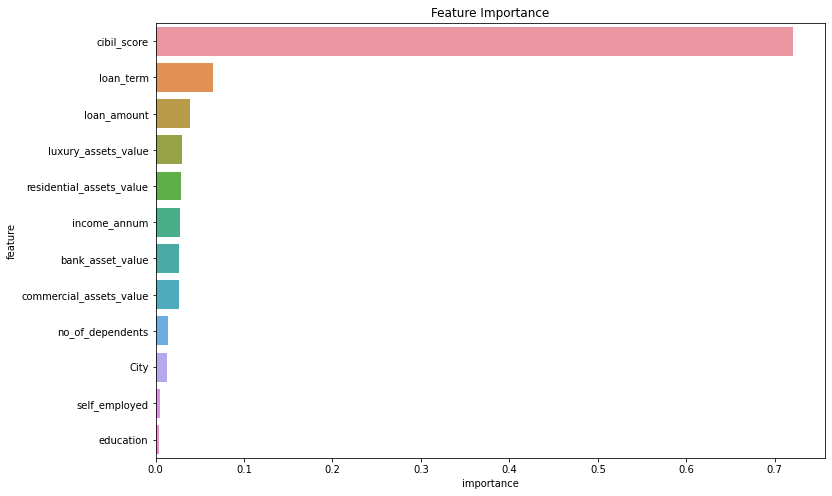

In [10]:
# initializing the model
model = RandomForestClassifier(random_state=42)

# training the model
model.fit(X_scaled, y)

# get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [11]:
top_features = feature_importance_df['feature'].tolist()

X_top = customer_df[top_features]

# scaling selected features
X_top_scaled = scaler.fit_transform(X_top)

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

### Evaluating Random Forest

In [12]:
# initializing the model
randomforest = RandomForestClassifier(random_state=42)

# training the model
randomforest.fit(X_train, y_train)

# predicting the target variable for the test set
y_pred = randomforest.predict(X_test)

# generating a classification report
print(classification_report(y_test, y_pred))

# generating a confusion matrix
print(confusion_matrix(y_test, y_pred))

# calculating the accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

print()


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       536
           1       0.97      0.87      0.92       318

    accuracy                           0.94       854
   macro avg       0.95      0.93      0.94       854
weighted avg       0.95      0.94      0.94       854

[[528   8]
 [ 40 278]]
Accuracy: 0.9437939110070258



### Evaluating Gradient Boosting

In [13]:
# initializing the model
gb_model = GradientBoostingClassifier(random_state=42)

# training the model
gb_model.fit(X_train, y_train)

# predicting the target variable for the test set
y_pred_gb = gb_model.predict(X_test)

# generating a classification report
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# generating a confusion matrix
print("Confusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

# calculating the accuracy
print('Accuracy for Gradient Boosting:', accuracy_score(y_test, y_pred_gb))


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       536
           1       0.98      0.89      0.93       318

    accuracy                           0.95       854
   macro avg       0.96      0.94      0.95       854
weighted avg       0.95      0.95      0.95       854

Confusion Matrix for Gradient Boosting:
[[530   6]
 [ 36 282]]
Accuracy for Gradient Boosting: 0.9508196721311475


### Evaluating SVM

In [14]:
# initializing the model
svm_model = SVC(random_state=42)

# training the model
svm_model.fit(X_train, y_train)

# predicting the target variable for the test set
y_pred_svm = svm_model.predict(X_test)

# generating a classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# generating a confusion matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

# calculating the accuracy
print('Accuracy for SVM:', accuracy_score(y_test, y_pred_svm))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       536
           1       0.89      0.84      0.86       318

    accuracy                           0.90       854
   macro avg       0.90      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854

Confusion Matrix for SVM:
[[503  33]
 [ 51 267]]
Accuracy for SVM: 0.9016393442622951


### Evaluating Logistic Regression

In [15]:
# initializing the model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# traning the model
logreg_model.fit(X_train, y_train)

# predicting the target variable for the test set
y_pred_logreg = logreg_model.predict(X_test)

# generating a classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# generating a confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))

# calculating the accuracy
print('Accuracy for Logistic Regression:', accuracy_score(y_test, y_pred_logreg))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       536
           1       0.87      0.83      0.85       318

    accuracy                           0.89       854
   macro avg       0.88      0.88      0.88       854
weighted avg       0.89      0.89      0.89       854

Confusion Matrix for Logistic Regression:
[[495  41]
 [ 53 265]]
Accuracy for Logistic Regression: 0.8899297423887588


# 1.2

In [16]:
import pickle

# saving the model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)


In [17]:
# loading the model from the file
with open('final_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
# verifying the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))


Accuracy of loaded model: 0.9508196721311475
